<a href="https://colab.research.google.com/github/Jojocko/NLP-projects-/blob/main/jo_supply_chain_project_visu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 100)

df = pd.read_csv('/content/drive/My Drive/Datasets NLP/dataset_supplychain.csv')
df.head(5)



,Commentaire,star,date,client,reponse,source,company,langage,cleaned_words,cleaned_lemma,Sentiment
0,"Colis commandé mardi 28 fevrier 23 , livraison le jeudi 02 mars 23 produit non recu au 7 mars 23Au prix du colis, amazon des incapables et chronopost pareilService client qui veule que je patiente une journée de plusLe colis est introuvable et meme chronopost renvoie la balle a amazonAmazon veut pas me renvoyé un autre article alors que ca fait une semaine que j'attend ce colis",1,2023-03-07,Toto,NaN,TrustPilot,Amazon,fr,colis commandé mardi fevrier livraison jeudi mars produit non recu mars 23au prix colis amazon incapables chronopost pareilservice client veule patiente journée plusle colis introuvable chronopost renvoie balle amazonamazon veut renvoyé article ca semaine attend colis,colis commander mardi fevrier livraison jeudi mars produit non recu mars 23au prix colis amazon incapable chronopost pareilservic client veule patient journée plusle colis introuvable chronopost renvoyer balle amazonamazon vouloir renvoyer article ca semaine attendre colis,__label__NEGATIVE
1,Amazon avec sa politique de retour est la pire que j ai vu contrairement a d autre site marchand.Montre défectueuse rendu il y a 10 jours et toujours pas de remboursement ce sont des méthodes de voleurs et de voyous et au téléphone il n y a que des incompétents et personne n a la même version de jours de retourAmazon c est a fuir dernière fois que je commande chez eux la concurrence est plus professionnelle.,1,2023-03-07,nasri eddine,NaN,TrustPilot,Amazon,fr,amazon politique pire contrairement site marchand.montre défectueuse rendu jours remboursement méthodes voleurs voyous téléphone incompétents version jours retouramazon fuir dernière fois commande concurrence professionnelle,amazon politique pire contrairement site marchand.montr défectueux rendre jour remboursement méthode voleur voyou téléphone incompétent version jour retouramazon fuir dernier fois commande concurrence professionnel,__label__NEGATIVE
2,"Dieu sait que j'en connais des déboires avec les sites marchands. Amazon n'échappe pas à la règle, il m'arrive d'expérimenter quelques désagréments. CEPENDANT, je n'ai rien à redire sur le service client d'Amazon. Les agents sont vraiment tournés vers la satisfaction du client. Ca change des autres commerces. Etant Prime, les livraisons rapides et retours gratuits sont très appréciables. Les autres commerces devraient s'en inspirer !!!",4,2023-03-07,Amandine,NaN,TrustPilot,Amazon,fr,dieu connais déboires sites marchands amazon échappe règle arrive expérimenter désagréments rien redire service client amazon agents vraiment tournés satisfaction client ca change commerces prime livraisons rapides retours gratuits appréciables commerces devraient inspirer,dieu connaître déboire site marchand amazon échapper règle arriver expérimenter désagrément rien redire service client amazon agent vraiment tourner satisfaction client ca changer commerce prime livraison rapide retour gratuit appréciable commerce devoir inspirer,__label__POSITIVE
3,"Nul, preleve une commande que je n'ai jamais reçu et le service client laisse des blancs jusqu'à ce qu'on raccroche et ça sur plusieurs appel. Donc amazone ma volé Dernière commande pour moi passé chez eux, ça m'apprendras à vouloir acheter chez les americains",1,2023-03-07,Bob Brico,NaN,TrustPilot,Amazon,fr,preleve commande jamais reçu service client laisse blancs jusqu' raccroche appel amazone volé dernière commande passé apprendras vouloir acheter americains,prelev commande jamais recevoir service client laisse blanc jusque raccrocher appel amazone voler dernier commande passer apprendre vouloir acheter americain,__label__NEGATIVE
4,Colis soit disant livré mais jamais reçu donc perdu non remboursé et falsification du bon de livraison soit disant signé par mes soins (Signature en majuscule) MDR je ne signe jamais de documents en majuscule ils moquent de leurs clients je vais résilier mon aboment Amazon Prime et en finir ave

In [ ]:
df = df.drop(['client', 'langage', 'reponse'], axis=1)
df.rename(columns={'Sentiment': 'sentiment', 'Commentaire': 'commentaire'}, inplace=True)
df['sentiment'] = df['sentiment'].replace({'__label__POSITIVE': 'positif', '__label__NEGATIVE': 'negatif', '__label__NEUTRAL': 'neutre'})
df['date'] = df['date'].fillna(method="ffill")
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year # pour visualiser par année et non par jour/mois/année


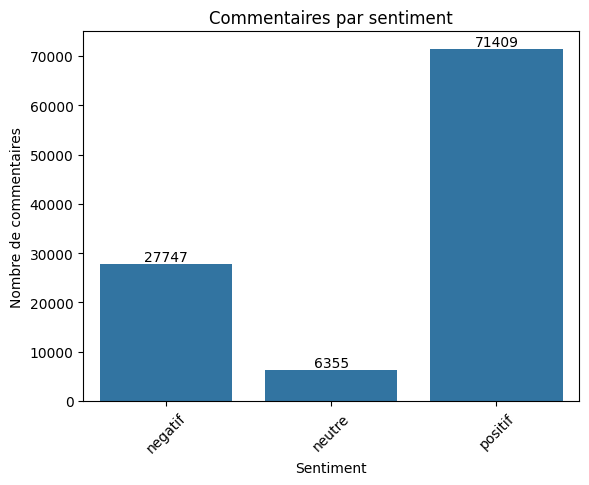

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = df.groupby('sentiment')['commentaire'].count()

sns.barplot(x=sentiment.index, y=sentiment.values)

plt.xlabel('Sentiment')
plt.ylabel('Nombre de commentaires')
plt.title('Commentaires par sentiment')
plt.xticks(rotation=45)
for index, value in enumerate(sentiment.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

Les résultats montrent plus de commentaires positifs (4, 5 étoiles). Nous pourrious donc à la fois analyser le contenu des commentaires positifs pour savoir ce qui influence la satisfaction client et les commentaires négatifs pour connaitre les points à améliorer.

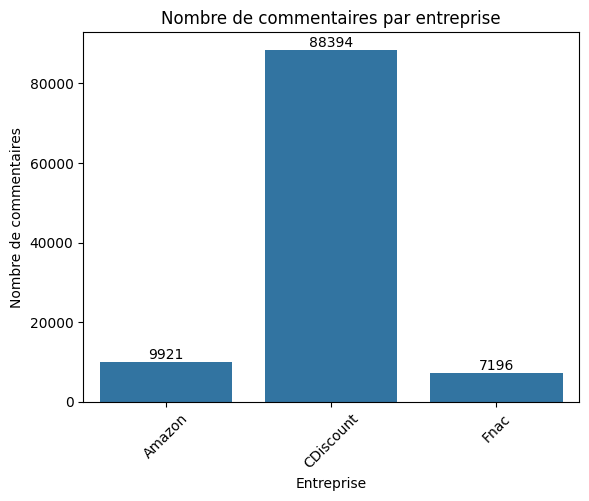

In [ ]:
# Nb de commentaires par entreprise

nb_commentaires = df.groupby('company')['commentaire'].count() # nb de commentaires par entreprise

sns.barplot(x=nb_commentaires.index, y=nb_commentaires.values)
plt.xlabel('Entreprise')
plt.ylabel('Nombre de commentaires')
plt.title('Nombre de commentaires par entreprise')
plt.xticks(rotation=45)
for index, value in enumerate(nb_commentaires.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()




On observe que le dataset n'est pas représentatif, avec beaucoup plus de commentaires pour CDiscount.

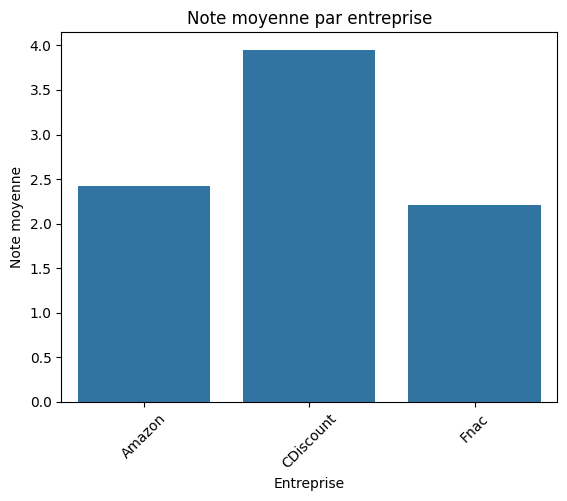

In [ ]:
# Note moyenne par entreprise

notes = df.groupby('company').agg({'star': 'mean'}) # répartition des notes par entreprise

sns.barplot(x=notes.index, y=notes['star'])
plt.xlabel('Entreprise')
plt.ylabel('Note moyenne')
plt.title('Note moyenne par entreprise')
plt.xticks(rotation=45)
plt.show()



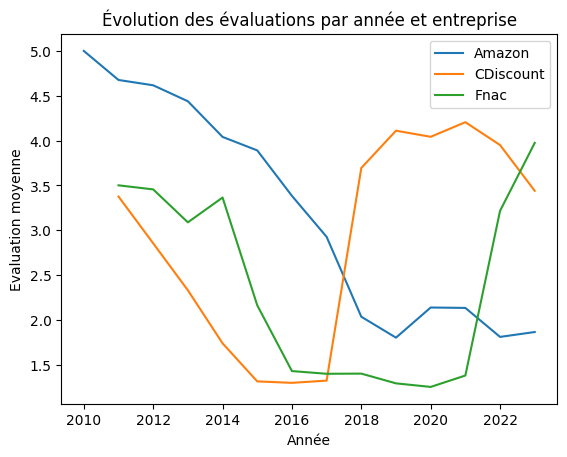

In [ ]:
# Évolution des évaluations

evolution = df.groupby([df['date'].dt.year, 'company']).agg({'star': 'mean'}) # évolution des notes par année et entreprise

for company in evolution['star'].unstack().columns:
    plt.plot(evolution['star'].unstack()[company], label=company)

plt.xlabel('Année')
plt.ylabel('Evaluation moyenne')
plt.title('Évolution des évaluations par année et entreprise')
plt.legend()
plt.show()


L'analyse chronologique montre que pour CDiscount, la note moyenne a escaladé en 2017, alors que la tendance générale pour Amazon est à la baisse et que pour Fnac, la hausse des notes débute en 2021. Il serait alors intéressant de voir si la hausse des notes correspond à une hausse ou baisse du nombre de commentaires.


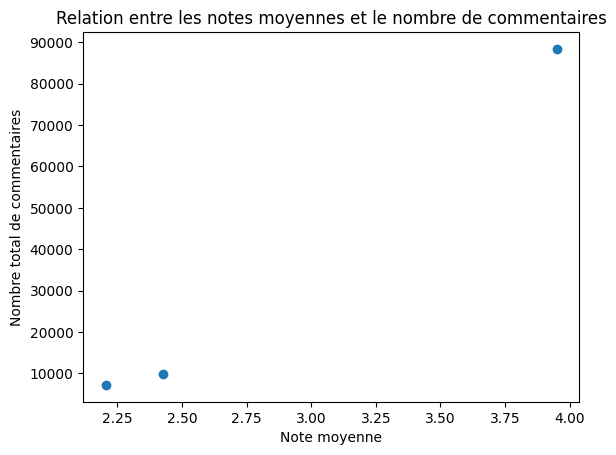

In [ ]:
# Relation entre nb de commentaires et notes moyennes

plt.figure
plt.scatter(notes['star'], nb_commentaires.values)

plt.xlabel('Note moyenne')
plt.ylabel('Nombre total de commentaires')
plt.title('Relation entre les notes moyennes et le nombre de commentaires')

plt.show()


Il est clair que pour CDiscount, plus le nombre de commentaires augmente, plus la note moyenne augmente aussi.


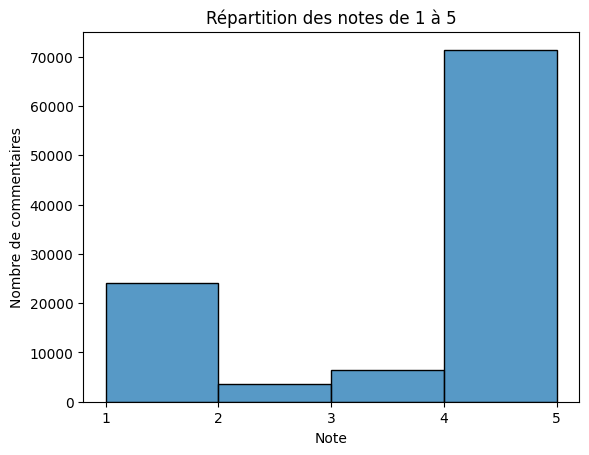

In [ ]:
# Répartition des notes

plt.figure
sns.histplot(data=df, x='star', binwidth=1, kde=False)

plt.xlabel('Note')
plt.ylabel('Nombre de commentaires')
plt.title('Répartition des notes de 1 à 5')
plt.xticks(range(1, 6))
plt.show()


Les notes 2 et 3 sont sous-représentés, indiquant que les internautes écrivent des commentaires pour dire qu'ils sont soit très satisfaits ou soit très insatisfaits.


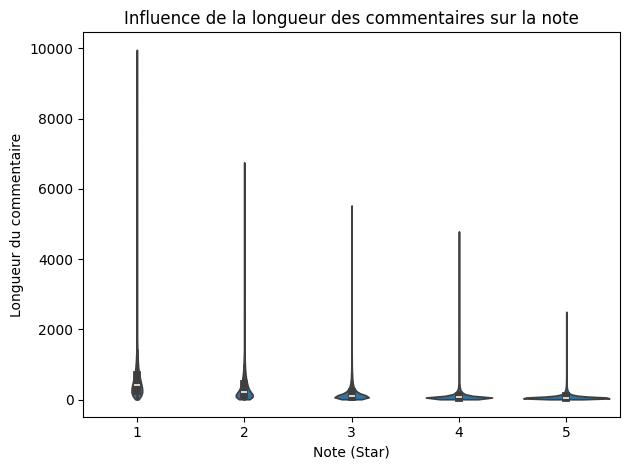

In [ ]:
# Influence de l'impact de la longueur d'un commentaire sur la note.

df['length'] = df['commentaire'].str.len()

fig, ax = plt.subplots()
sns.violinplot(x="star", y="length", data=df, ax=ax, cut=0)
ax.set_title('Influence de la longueur des commentaires sur la note')
ax.set_xlabel('Note (Star)')
ax.set_ylabel('Longueur du commentaire')
plt.tight_layout()
plt.show()



Les commentaires positifs (4, 5 étoiles) ont tendance à être plus concis.
Plus les notes deviennent négatives, plus les commentaires sont détaillés et représentent probablement des critiques explicatives données par des clients insatisfaits.

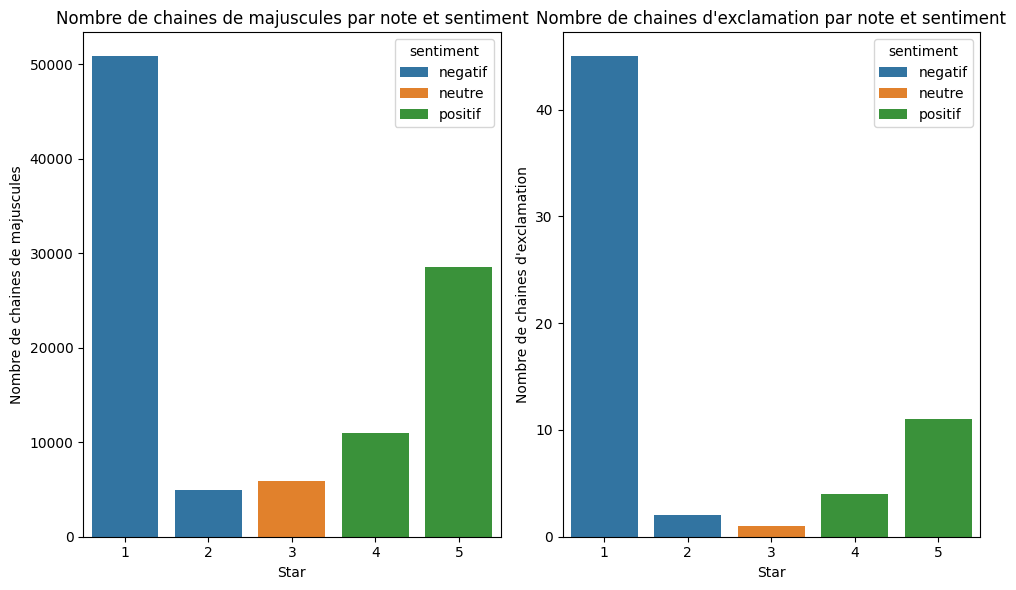

In [ ]:
# Extraction des exclamations et majuscules
import re

def find_chain_CAPSLOCK(tweet):
    r = re.compile(r"[A-Z]{2,}")
    capslock = r.findall(tweet)
    return len(capslock)

def find_chain_exclamation(tweet):
    r = re.compile(r"(\! ){2,}")
    exclamation = r.findall(tweet)
    return len(exclamation)

df['chain_capslock'] = df.commentaire.apply(lambda x: find_chain_CAPSLOCK(str(x)))
df['chain_exclamation'] = df.commentaire.apply(lambda x: find_chain_exclamation(str(x)))

grouped_data = df.groupby(['star', 'sentiment']).agg({
    'chain_capslock': 'sum',
    'chain_exclamation': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

# Graphique pour chain_capslock
plt.subplot(1, 2, 1)
sns.barplot(data=grouped_data, x='star', y='chain_capslock', hue='sentiment')
plt.title('Nombre de chaines de majuscules par note et sentiment')
plt.xlabel('Star')
plt.ylabel('Nombre de chaines de majuscules')

# Graphique pour chain_exclamation
plt.subplot(1, 2, 2)
sns.barplot(data=grouped_data, x='star', y='chain_exclamation', hue='sentiment')
plt.title("Nombre de chaines d'exclamation par note et sentiment")
plt.xlabel('Star')
plt.ylabel("Nombre de chaines d'exclamation")

plt.tight_layout()
plt.show()



Les internautes semblent exprimer leurs sentiments (positifs et négatifs) davantage avec des majuscules que des points d'exclamation.
